# The Quantum Toolbox in Python(QuTip)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [3]:
pip install qutip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 333.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from qutip import *

Creating and inspecting quantum objects
We can create a new quantum object using the Qobj class constructor, like this:

In [5]:
q = Qobj([[1], [0]])

q

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

Here we passed python list as an argument to the class constructor. The data in this list is used to construct the matrix representation of the quantum objects, and the other properties of the quantum object is by default computed from the same data.
We can inspect the properties of a Qobj instance using the following class method:

In [6]:
# the dimension, or composite Hilbert state space structure
q.dims

[[2], [1]]

In [8]:
# the shape of the matrix data representation
q.shape

(2, 1)

In [9]:
# the matrix data itself, in sparse matrix format. 
q.data

Dense(shape=(2, 1), fortran=True)

In [10]:
# get the dense matrix representation
q.full()

array([[1.+0.j],
       [0.+0.j]])

In [11]:
# some additional properties
q.isherm, q.type 

(False, 'ket')

### Using `Qobj` instances for calculations

With `Qobj` instances we can do arithmetic and apply a number of different operations using class methods:

In [13]:
sy = Qobj([[0,-1j], [1j,0]])  # the sigma-y Pauli operator

sy

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

In [14]:
sz = Qobj([[1,0], [0,-1]]) # the sigma-z Pauli operator

sz

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [15]:
# some arithmetic with quantum objects

H = 1.0 * sz + 0.1 * sy

print("Qubit Hamiltonian = \n")
H

Qubit Hamiltonian = 



Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.+0.j   0.-0.1j]
 [ 0.+0.1j -1.+0.j ]]

Example of modifying quantum objects using the Qobj methods:

In [16]:
# The hermitian conjugate
sy.dag()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

In [17]:
# The trace
H.tr()

0.0

In [18]:
# Eigen energies
H.eigenenergies()

array([-1.00498756,  1.00498756])

States and operators
Normally we do not need to create Qobj instances from stratch, using its constructor and passing its matrix represantation as argument. Instead we can use functions in QuTiP that generates common states and operators for us. Now some examples of built-in state functions:


# State vectors

In [19]:
# Fundamental basis states (Fock states of oscillator modes)

N = 9 # number of states in the Hilbert space
n = 1 # the state that will be occupied

basis(N, n)    # equivalent to fock(N, n)

Quantum object: dims=[[9], [1]], shape=(9, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [20]:
fock(4, 2) # another example

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [21]:
# a coherent state
coherent(N=10, alpha=1.0)

Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]

# Density matrices

In [22]:
# a fock state as density matrix
fock_dm(5, 2) # 5 = hilbert space size, 2 = state that is occupied

Quantum object: dims=[[5], [5]], shape=(5, 5), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

In [23]:
# coherent state as density matrix
coherent_dm(N=3, alpha=1.0)

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.37595025 0.34940848 0.33544802]
 [0.34940848 0.32474053 0.31176567]
 [0.33544802 0.31176567 0.29930922]]

In [24]:
# thermal state
n = 1 # average number of thermal photons
thermal_dm(8, n)

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.50196078 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.25098039 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.1254902  0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.0627451  0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.03137255 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.01568627
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157]]

# Operators

Qubit (two-level system) operators:

In [25]:
# Pauli sigma x
sigmax()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [26]:
# Pauli sigma y
sigmay()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [27]:
# Pauli sigma z
sigmaz()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

# Harmonic oscillator operators

In [28]:
#annihilation operator

destroy(N=8) # N = number of fock states included in the Hilbert space

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]

In [29]:
# creation operator

create(N=8) # equivalent to destroy(8).dag()

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

In [30]:
# the position operator constructed from the annihilation operator:
a = destroy(8)

x = a + a.dag()

x

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

Using Qobj instances we can check some well known commutation relations:

In [31]:
def commutator(op1, op2):
    return op1 * op2 - op2 * op1

$[a, a^1] = 1$

In [32]:
a = destroy(5)

commutator(a, a.dag())

Quantum object: dims=[[5], [5]], shape=(5, 5), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -4.]]

he result is not identity, because we have truncated the Hilbert space. But that's fine as long as the highest Fock state isn't involved in the dynamics of our truncated Hilbert space. If it isthe case,then the approximation that the truncation introduces might be a problem.

having: $[x,p] = i$

In [37]:
x =(a + a.dag())/np.sqrt(2)
p = -1j * (a - a.dag())/np.sqrt(2)

In [38]:
commutator(x, p)

Quantum object: dims=[[5], [5]], shape=(5, 5), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-4.j]]

this could be observed that there are still Same issue with the truncated Hilbert space, but otherwise it's working fine

Trying Pauli spin inequalities:
[𝜎𝑥,𝜎𝑦]=2𝑖𝜎𝑧 

In [39]:
commutator(sigmax(), sigmay()) - 2j * sigmaz()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0.]
 [0. 0.]]

Another case: −𝑖𝜎𝑥𝜎𝑦𝜎𝑧=1 

In [40]:
-1j * sigmax() * sigmay() * sigmaz()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]

𝜎2𝑥=𝜎2𝑦=𝜎2𝑧=1 

In [41]:
sigmax()**2 == sigmay()**2 == sigmaz()**2 == qeye(2)

True

In [50]:
N

9

# Composite systems

In most cases we are interested in coupled quantum systems, for example coupled qubits, a qubit coupled to a cavity (oscillator mode), etc.
To define states and operators for such systems in QuTiP, we use the tensor function to create Qobj instances for the composite system.
Ex: consider a system composed of two qubits. If we want to create a Pauli  𝜎𝑧  operator that acts on the first qubit and leaves the second qubit unaffected (i.e., the operator 𝜎𝑧⊗1),we would do:

In [53]:
sz1 = tensor(sigmaz(), qeye(2))

sz1

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

In [57]:
sz1 = tensor(sigmaz(), qeye(2))

N

2

We can easily verify that this two-qubit operator does, when having the desired properties:

In [58]:
psi1 = tensor(basis(N,1), basis(N,0)) # excited first qubit |10>
psi2 = tensor(basis(N,0), basis(N,1)) # excited second qubit

In [59]:
sz1 * psi1 == psi1 # this should not be true, because sz1 should flip the sign of the excited state of psi1

False

In [60]:
sz1 * psi2 == psi2 # this should be true, because sz1 should leave psi2 unaffected

True

Above we used the `qeye(N)` function, which generates the identity operator with `N` quantum states. If we want to do the same thing for the second qubit we can do:

In [61]:
sz2 = tensor(qeye(2), sigmaz())

sz2

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

Note the order of the argument to the `tensor` function, and the correspondingly different matrix representation of the two operators `sz1` and `sz2`.

Using the same method we can create coupling terms of the form $\sigma_x \otimes \sigma_x$:

In [62]:
tensor(sigmax(), sigmax())

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Now we cano create a `Qobj` representation of a coupled two-qubit Hamiltonian: $H = \epsilon_1 \sigma_z^{(1)} + \epsilon_2 \sigma_z^{(2)} + g \sigma_x^{(1)}\sigma_x^{(2)}$

In [63]:
epsilon = [1.0, 1.0]
g = 0.1

sz1 = tensor(sigmaz(), qeye(2))
sz2 = tensor(qeye(2), sigmaz())

H = epsilon[0] * sz1 + epsilon[1] * sz2 + g * tensor(sigmax(), sigmax())

H

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 2.   0.   0.   0.1]
 [ 0.   0.   0.1  0. ]
 [ 0.   0.1  0.   0. ]
 [ 0.1  0.   0.  -2. ]]

To create composite systems of different types, all we need to do is to change the operators that we pass to the `tensor` function (which can take an arbitrary number of operator for composite systems with many components).

For example, the Jaynes-Cumming Hamiltonian for a qubit-cavity system:

$H = \omega_c a^\dagger a - \frac{1}{2}\omega_a \sigma_z + g (a \sigma_+ + a^\dagger \sigma_-)$

In [64]:
wc = 1.0 # cavity frequency
wa = 1.0 # qubit/atom frenqency
g = 0.1  # coupling strength

# cavity mode operator
a = tensor(destroy(5), qeye(2))

# qubit/atom operators
sz = tensor(qeye(5), sigmaz())   # sigma-z operator
sm = tensor(qeye(5), destroy(2)) # sigma-minus operator

# the Jaynes-Cumming Hamiltonian
H = wc * a.dag() * a - 0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)

H

Quantum object: dims=[[5, 2], [5, 2]], shape=(10, 10), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.5         0.1         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.1         0.5         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.5         0.14142136  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.14142136  1.5         0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.5
   0.17320508  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.17320508
   2.5         0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   

Note: 

$a \sigma_+ = (a \otimes \mathbf{1}) (\mathbf{1} \otimes \sigma_+)$

so the following two are identical:

In [65]:
a = tensor(destroy(3), qeye(2))
sp = tensor(qeye(3), create(2))

a * sp

Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

In [66]:
tensor(destroy(3), create(2))

Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

# Unitary dynamics


Unitary evolution of a quantum system in QuTiP can be calculated with the mesolve function.
mesolve is short for Master-eqaution solve (for dissipative dynamics), but if no collapse operators (which describe the dissipation) are given to the solve it falls back on the unitary evolution of the Schrodinger (for initial states in state vector for) or the von Neuman equation (for initial states in density matrix form).
The evolution solvers in QuTiP returns a class of type Odedata, which contains the solution to the problem posed to the evolution solver.
For example, considor a qubit with Hamiltonian  𝐻=𝜎𝑥  and initial state  ||1⟩  (in the sigma-z basis): It's evolution can be calculated as follows:

In [68]:
# Hamiltonian
H = sigmax()

# initial state
psi0 = basis(2, 0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, [], [])

result

<Result
  Solver: sesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00020813941955566406
    preparation time: 0.00025391578674316406
    run time: 0.006565093994140625
    solver: 'Schrodinger Evolution'
  Time interval: [0.0, 10.0] (100 steps)
  Number of e_ops: 0
  States saved.
>

The result object contains a list of the wavefunctions at the times requested with the tlist array.

In [69]:
len(result.states)

100

In [70]:
result.states[-1] # the finial state

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.83906638+0.j        ]
 [ 0.        +0.54402905j]]

# Expectation values

The expectation values of an operator given a state vector or density matrix (or list thereof) can be calculated using the expect function.

In [71]:
expect(sigmaz(), result.states[-1])

0.40806479408005614

In [72]:
expect(sigmaz(), result.states)

array([ 1.        ,  0.97966324,  0.9194801 ,  0.82189845,  0.69088728,
        0.53177528,  0.35103398,  0.15601481, -0.04535002, -0.24487027,
       -0.43443068, -0.60632131, -0.7535507 , -0.87013055, -0.951319  ,
       -0.99381383, -0.9958867 , -0.9574533 , -0.88007676, -0.76690429,
       -0.62253905, -0.45285285, -0.26474744, -0.06587387,  0.13567909,
        0.3317135 ,  0.51425587,  0.67588157,  0.81001677,  0.91120556,
        0.97533227,  0.99978876,  0.98358026,  0.92736593,  0.83343229,
        0.70559992,  0.54906818,  0.37020385,  0.17628203, -0.0248099 ,
       -0.22489269, -0.41582823, -0.58985057, -0.73988155, -0.85981879,
       -0.9447841 , -0.9913216 , -0.99753841, -0.96318177, -0.88964906,
       -0.77993099, -0.6384903 , -0.47107995, -0.284509  , -0.08636599,
        0.11528974,  0.31225626,  0.49652225,  0.66059275,  0.79779446,
        0.90254706,  0.97058988,  0.99915523,  0.98708135,  0.93485936,
        0.84461322,  0.7200135 ,  0.56612831,  0.38921658,  0.19

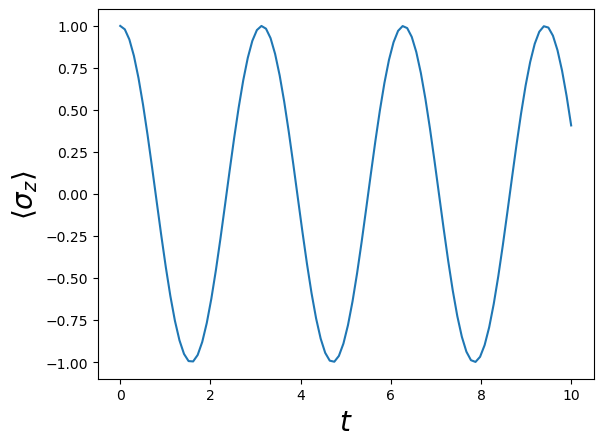

In [73]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, expect(sigmaz(), result.states))

axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r'$\left<\sigma_z\right>$', fontsize=20);

If we are only interested in expectation values, we could pass a list of operators to the mesolve function that we want expectation values for, and have the solver compute then and store the results in the Odedata class instance that it returns.
For example, to request that the solver calculates the expectation values for the operators  𝜎𝑥,𝜎𝑦,𝜎𝑧 :

In [74]:
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

Now the expectation values are available in result.expect[0], result.expect[1], and result.expect[2]:

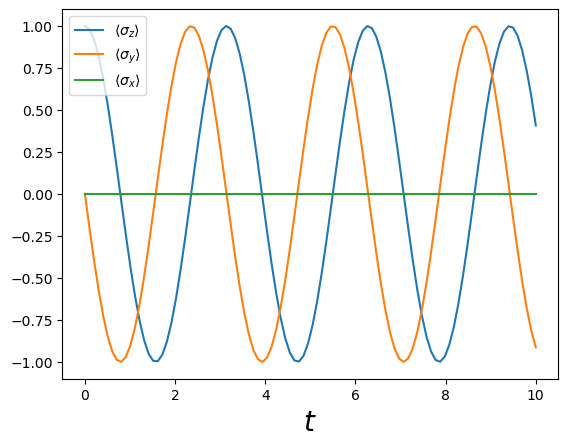

In [75]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, result.expect[2], label=r'$\left<\sigma_z\right>$')
axes.plot(tlist, result.expect[1], label=r'$\left<\sigma_y\right>$')
axes.plot(tlist, result.expect[0], label=r'$\left<\sigma_x\right>$')

axes.set_xlabel(r'$t$', fontsize=20)
axes.legend(loc=2);

## Dissipative dynamics

To add dissipation to a problem, all we need to do is to define a list of collapse operators to the call to the `mesolve` solver.

A collapse operator is an operator that describes how the system is interacting with its environment. 

For instance, if we consider a quantum harmonic oscillator with Hamiltonian 

$H = \hbar\omega a^\dagger a$

and which loses photons to its environment with a relaxation rate $\kappa$. The collapse operator that describes this process is 

$\sqrt{\kappa} a$

since $a$ is the photon annihilation operator of the oscillator. 

To program this problem in QuTiP:

In [77]:
w = 1.0               # oscillator frequency
kappa = 0.1           # relaxation rate
a = destroy(10)       # oscillator annihilation operator
rho0 = fock_dm(10, 5) # initial state, fock state with 5 photons
H = w * a.dag() * a   # Hamiltonian

# A list of collapse operators
c_ops = [np.sqrt(kappa) * a]

In [78]:
tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value of the photon number state operator a.dag() * a
result = mesolve(H, rho0, tlist, c_ops, [a.dag() * a]) 

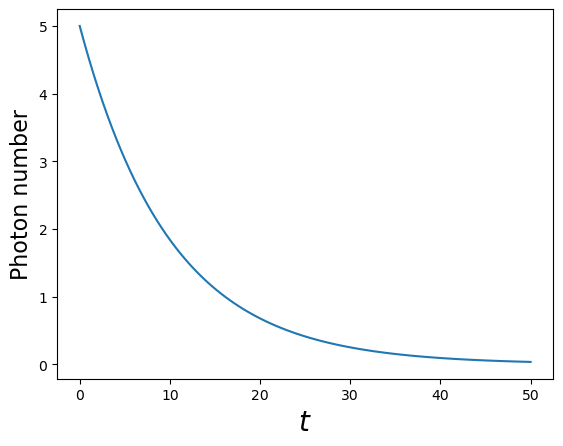

In [79]:
fig, axes = plt.subplots(1,1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Photon number", fontsize=16);

checking the software version:

In [80]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,5.1.0
Numpy,1.26.4
SciPy,1.14.1
matplotlib,3.7.0
Number of CPUs,8
BLAS Info,Generic
IPython,8.10.0
Python,"3.10.9 (main, Mar 1 2023, 12:20:14) [Clang 14.0.6 ]"
OS,posix [darwin]
Cython,3.0.6
